In [1]:
import numpy as np
import h5py
import os
from matplotlib import pyplot as plt

import sys
sys.path.append("../../") # go to parent dir


import iact_dnn_utils as utils

In [37]:
folder = '/home/saturn/caph/mpp228/CTA_data/Prod5_GRID/Prod5_square_images/'
fls = [fn for fn in os.listdir(folder) if fn.endswith('.h5')]
fls = [fn for fn in fls if fn.find('MST') > -1]
print(fls)

['gamma-diffuse_1000_images_mono_Etrue_min0.3TeV_MST_MST_FlashCam_file5_test.h5', 'gamma-diffuse_100000_images_mono_Etrue_min0.3TeV_MST_MST_FlashCam_file6.h5', 'gamma-diffuse_1000_images_mono_Etrue_min0.3TeV_MST_MST_FlashCam_file4_test.h5', 'proton_100000_images_mono_Etrue_min0.3TeV_MST_MST_FlashCam_file3.h5', 'gamma-diffuse_100000_images_mono_Etrue_min0.3TeV_MST_MST_FlashCam_file3.h5', 'proton_100000_images_mono_Etrue_min0.3TeV_MST_MST_FlashCam_file4.h5', 'gamma-diffuse_1000_images_mono_Etrue_min0.3TeV_MST_MST_FlashCam_file2_test.h5', 'gamma-diffuse_1000_images_mono_Etrue_min0.3TeV_MST_MST_FlashCam_file6_test.h5', 'gamma-diffuse_100000_images_mono_Etrue_min0.3TeV_MST_MST_FlashCam_file7.h5', 'gamma-diffuse_100000_images_mono_Etrue_min0.3TeV_MST_MST_FlashCam_file2.h5', 'gamma-diffuse_1000_images_mono_Etrue_min0.3TeV_MST_MST_FlashCam_file3_test.h5', 'proton_100000_images_mono_Etrue_min0.3TeV_MST_MST_FlashCam_file5.h5', 'gamma-diffuse_100000_images_mono_Etrue_min0.3TeV_MST_MST_FlashCam_fi

In [47]:
k = 1
h5 = h5py.File(folder + fls[k], 'r')
print(fls[k])

gamma-diffuse_100000_images_mono_Etrue_min0.3TeV_MST_MST_FlashCam_file6.h5


In [48]:
h5['tel_pars'].keys()

<KeysViewHDF5 ['event_id', 'hillas_intensity', 'hillas_kurtosis', 'hillas_length', 'hillas_phi', 'hillas_psi', 'hillas_r', 'hillas_skewness', 'hillas_width', 'hillas_x', 'hillas_y', 'intensity_mean', 'leakage_intensity_width_1', 'leakage_intensity_width_2', 'leakage_pixels_width_1', 'leakage_pixels_width_2', 'morphology_num_large_islands', 'morphology_num_medium_islands', 'morphology_num_pixels', 'obs_id', 'tel_id']>

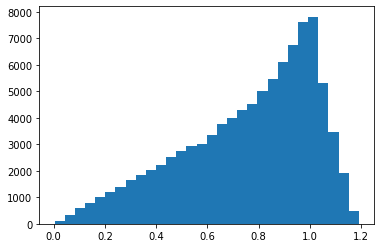

In [49]:
key = 'hillas_r' # 'leakage_pixels_width_2'
values = np.array(h5['tel_pars'][key]).flatten()
nan_mask = ~np.isnan(values)
plt.hist(values[nan_mask], bins=30);
#plt.hist(values, bins=np.arange(0, 2, 0.1));

(100000,)


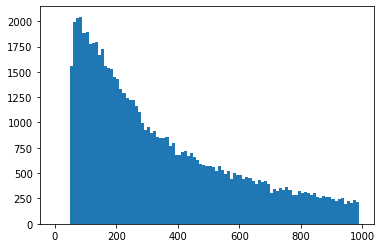

In [54]:
key2 = 'hillas_intensity'
values2 = np.array(h5['tel_pars'][key2]).flatten()
nan_mask2 = ~np.isnan(values2)
print(nan_mask2.shape)
plt.hist(values2[nan_mask2], bins=np.arange(0, 1000, 10));

In [59]:
images = np.array(h5['image_mask'])
images.shape

(100000, 112, 112)

In [60]:
if 0:
    %%time
    images = utils.flatten_tel_images(images)

In [61]:
%%time
images_sel = images[nan_mask2]

True
CPU times: user 707 ms, sys: 1.22 s, total: 1.93 s
Wall time: 1.93 s


In [62]:
if key == 'hillas_r':
    v_bins = np.arange(0, 1.26, 0.25)
elif key == 'leakage_pixels_width_2':
    v_bins = np.arange(0, 0.041, 0.005)
v2_min = 50
v2_max = 200
nraw = 2
ncol = 4
nplot = nraw * ncol
size = 2.5
mask2 = (values2 > v2_min) & (values2 < v2_max)

for m in range(len(v_bins) - 1):
    mask1 = (values >= v_bins[m]) & (values < v_bins[m + 1])
    images_sel = images[mask1 & mask2][:,:,:,0]
    fig = plt.figure(figsize=(size*ncol, size*nraw))
    if len(images_sel) < nplot:
        print(len(images_sel))
        continue
    plot_inds = np.random.choice(len(images_sel), size=nplot, replace=False)
    for i, ind in enumerate(plot_inds):
        plt.subplot(nraw, ncol, i + 1)
        plt.imshow(images_sel[ind], cmap='gray', vmin=0)
        plt.axis('off')
    plt.suptitle('Value in (%.3f, %.3f)' % (v_bins[m], v_bins[m+1]));

IndexError: too many indices for array: array is 3-dimensional, but 4 were indexed